# Analyzing the data of IPL

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
df = pd.read_csv('ipl.csv ')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.shape

(76014, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [7]:
# Removing the columns that doesnot contribute to the algorithm
cols_to_remove = ['mid', 'striker', 'non-striker', 'venue', 'batsman', 'bowler']
df = df.drop(labels=cols_to_remove, axis =1)

In [8]:
df.shape

(76014, 9)

In [9]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
# Keeping the teams that are currently in the game
teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 
         'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

df = df[df['bat_team'].isin(teams) & df['bowl_team'].isin(teams)]
print("Shape of Dataset after removing : ", df.shape)

Shape of Dataset after removing :  (53811, 9)


In [12]:
# Removing the Super Overs
df = df[df['overs']>6]
print("Shape of Dataset after removing : ", df.shape)

Shape of Dataset after removing :  (37371, 9)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37371 entries, 38 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            37371 non-null  object 
 1   bat_team        37371 non-null  object 
 2   bowl_team       37371 non-null  object 
 3   runs            37371 non-null  int64  
 4   wickets         37371 non-null  int64  
 5   overs           37371 non-null  float64
 6   runs_last_5     37371 non-null  int64  
 7   wickets_last_5  37371 non-null  int64  
 8   total           37371 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.9+ MB


In [14]:
# Formatting the Date Field into date format
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37371 entries, 38 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            37371 non-null  datetime64[ns]
 1   bat_team        37371 non-null  object        
 2   bowl_team       37371 non-null  object        
 3   runs            37371 non-null  int64         
 4   wickets         37371 non-null  int64         
 5   overs           37371 non-null  float64       
 6   runs_last_5     37371 non-null  int64         
 7   wickets_last_5  37371 non-null  int64         
 8   total           37371 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 2.9+ MB


In [15]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [16]:
# One Hot Encoding for the bat_team & bowl_team
df = pd.get_dummies(data = df, columns=['bat_team','bowl_team'])
df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df.shape

(37371, 23)

In [19]:
# Splitting the data
x_train = df.drop('total', axis = 1)[df['date'].dt.year<2017]
x_test = df.drop('total', axis = 1)[df['date'].dt.year>=2017]

y_train = df['total'][df['date'].dt.year<2017]
y_test = df['total'][df['date'].dt.year>=2017]

In [20]:
# drop date field
x_train = x_train.drop('date', axis = 1)
x_test = x_test.drop('date', axis = 1)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34779, 21)
(2592, 21)
(34779,)
(2592,)


# Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
# Parameters for model
lasso = Lasso()
params = {'alpha': [1e-15, 1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [24]:
# Grid Search
lasso_regressor = GridSearchCV(lasso, params,
                              scoring ='neg_mean_squared_error', cv=5)

In [25]:
# model fitting
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [26]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [27]:
# Building model on best param
lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [29]:
# model prediction
y_predict = lasso.predict(x_test)

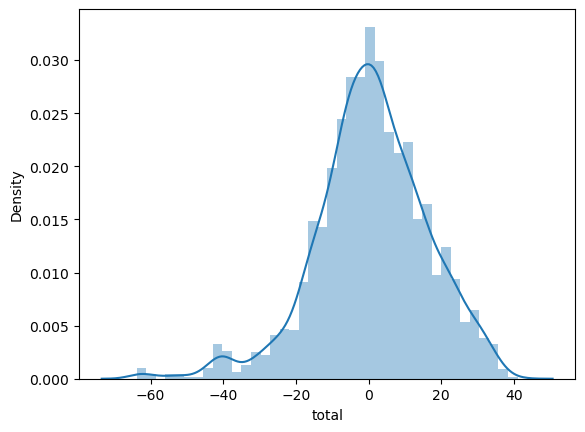

In [31]:
# Dist plot 
sns.distplot(y_test-y_predict)
plt.show()

In [36]:
from sklearn import metrics

print("MAE :", metrics.mean_absolute_error(y_test,y_predict))
print()
print("MSE :", metrics.mean_squared_error(y_test,y_predict))
print()
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print()
print("MAPE :", metrics.mean_absolute_percentage_error(y_test,y_predict)*100)
print()

MAE : 11.78591922041425

MSE : 240.39922270658542

RMSE : 15.50481288847387

MAPE : 8.108048208945021



In [37]:
print("Accuracy : ", metrics.r2_score(y_test,y_predict))

Accuracy :  0.7618370765953089


# Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [39]:
regr.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
y_pred = regr.predict(x_test)

In [42]:
print("RF Accuracy : ", metrics.r2_score(y_test,y_pred))

RF Accuracy :  0.6650387062977843


# Cat Boost Regressor

In [43]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(learning_rate=0.15)

cat.fit(x_train, y_train)
y_pred_cat = cat.predict(x_test)

0:	learn: 27.3876475	total: 335ms	remaining: 5m 34s
1:	learn: 25.6361926	total: 359ms	remaining: 2m 59s
2:	learn: 24.1546487	total: 384ms	remaining: 2m 7s
3:	learn: 23.0342511	total: 397ms	remaining: 1m 38s
4:	learn: 22.0687579	total: 411ms	remaining: 1m 21s
5:	learn: 21.3135215	total: 422ms	remaining: 1m 9s
6:	learn: 20.6977962	total: 433ms	remaining: 1m 1s
7:	learn: 20.1676091	total: 443ms	remaining: 55s
8:	learn: 19.6999170	total: 454ms	remaining: 50s
9:	learn: 19.3334285	total: 464ms	remaining: 45.9s
10:	learn: 19.0086852	total: 474ms	remaining: 42.6s
11:	learn: 18.7140735	total: 482ms	remaining: 39.7s
12:	learn: 18.4642528	total: 493ms	remaining: 37.4s
13:	learn: 18.3061509	total: 504ms	remaining: 35.5s
14:	learn: 18.0787847	total: 513ms	remaining: 33.7s
15:	learn: 17.8895930	total: 524ms	remaining: 32.3s
16:	learn: 17.7348841	total: 535ms	remaining: 30.9s
17:	learn: 17.6017218	total: 547ms	remaining: 29.8s
18:	learn: 17.4586638	total: 558ms	remaining: 28.8s
19:	learn: 17.3500803	

172:	learn: 12.2605630	total: 2s	remaining: 9.58s
173:	learn: 12.2412920	total: 2.01s	remaining: 9.54s
174:	learn: 12.2199990	total: 2.02s	remaining: 9.51s
175:	learn: 12.2052422	total: 2.03s	remaining: 9.49s
176:	learn: 12.1935476	total: 2.04s	remaining: 9.49s
177:	learn: 12.1886650	total: 2.05s	remaining: 9.47s
178:	learn: 12.1730119	total: 2.06s	remaining: 9.47s
179:	learn: 12.1585130	total: 2.08s	remaining: 9.46s
180:	learn: 12.1525447	total: 2.08s	remaining: 9.44s
181:	learn: 12.1371091	total: 2.1s	remaining: 9.43s
182:	learn: 12.1233037	total: 2.11s	remaining: 9.42s
183:	learn: 12.1088331	total: 2.12s	remaining: 9.4s
184:	learn: 12.0760042	total: 2.13s	remaining: 9.38s
185:	learn: 12.0563554	total: 2.14s	remaining: 9.36s
186:	learn: 12.0340254	total: 2.15s	remaining: 9.33s
187:	learn: 12.0225059	total: 2.15s	remaining: 9.3s
188:	learn: 12.0167521	total: 2.16s	remaining: 9.27s
189:	learn: 12.0001622	total: 2.17s	remaining: 9.25s
190:	learn: 11.9882206	total: 2.18s	remaining: 9.22s

351:	learn: 10.4821149	total: 3.64s	remaining: 6.71s
352:	learn: 10.4754044	total: 3.65s	remaining: 6.7s
353:	learn: 10.4677994	total: 3.66s	remaining: 6.68s
354:	learn: 10.4625394	total: 3.67s	remaining: 6.66s
355:	learn: 10.4434752	total: 3.7s	remaining: 6.7s
356:	learn: 10.4363602	total: 3.71s	remaining: 6.68s
357:	learn: 10.4322772	total: 3.72s	remaining: 6.67s
358:	learn: 10.4292093	total: 3.73s	remaining: 6.66s
359:	learn: 10.4209292	total: 3.74s	remaining: 6.65s
360:	learn: 10.4144749	total: 3.75s	remaining: 6.64s
361:	learn: 10.4093207	total: 3.76s	remaining: 6.63s
362:	learn: 10.4018855	total: 3.77s	remaining: 6.62s
363:	learn: 10.3997061	total: 3.78s	remaining: 6.61s
364:	learn: 10.3926054	total: 3.79s	remaining: 6.59s
365:	learn: 10.3887988	total: 3.8s	remaining: 6.58s
366:	learn: 10.3869254	total: 3.81s	remaining: 6.56s
367:	learn: 10.3842004	total: 3.81s	remaining: 6.55s
368:	learn: 10.3750725	total: 3.82s	remaining: 6.53s
369:	learn: 10.3696541	total: 3.83s	remaining: 6.5

530:	learn: 9.4703765	total: 5.29s	remaining: 4.67s
531:	learn: 9.4651197	total: 5.3s	remaining: 4.66s
532:	learn: 9.4624020	total: 5.31s	remaining: 4.65s
533:	learn: 9.4578083	total: 5.32s	remaining: 4.64s
534:	learn: 9.4528200	total: 5.33s	remaining: 4.63s
535:	learn: 9.4508664	total: 5.34s	remaining: 4.62s
536:	learn: 9.4466569	total: 5.35s	remaining: 4.61s
537:	learn: 9.4411157	total: 5.36s	remaining: 4.6s
538:	learn: 9.4397423	total: 5.37s	remaining: 4.59s
539:	learn: 9.4389848	total: 5.37s	remaining: 4.58s
540:	learn: 9.4381056	total: 5.38s	remaining: 4.56s
541:	learn: 9.4333058	total: 5.38s	remaining: 4.55s
542:	learn: 9.4248895	total: 5.39s	remaining: 4.54s
543:	learn: 9.4234857	total: 5.4s	remaining: 4.53s
544:	learn: 9.4205838	total: 5.41s	remaining: 4.51s
545:	learn: 9.4168429	total: 5.42s	remaining: 4.5s
546:	learn: 9.4151422	total: 5.42s	remaining: 4.49s
547:	learn: 9.4091380	total: 5.44s	remaining: 4.49s
548:	learn: 9.4036405	total: 5.46s	remaining: 4.48s
549:	learn: 9.40

691:	learn: 8.9129769	total: 6.88s	remaining: 3.06s
692:	learn: 8.9079438	total: 6.89s	remaining: 3.05s
693:	learn: 8.9021591	total: 6.9s	remaining: 3.04s
694:	learn: 8.9008679	total: 6.91s	remaining: 3.03s
695:	learn: 8.8959051	total: 6.92s	remaining: 3.02s
696:	learn: 8.8939198	total: 6.93s	remaining: 3.01s
697:	learn: 8.8869521	total: 6.94s	remaining: 3s
698:	learn: 8.8823872	total: 6.95s	remaining: 2.99s
699:	learn: 8.8782772	total: 6.96s	remaining: 2.98s
700:	learn: 8.8764786	total: 6.97s	remaining: 2.97s
701:	learn: 8.8714347	total: 6.98s	remaining: 2.96s
702:	learn: 8.8658150	total: 6.99s	remaining: 2.95s
703:	learn: 8.8633038	total: 6.99s	remaining: 2.94s
704:	learn: 8.8605325	total: 7s	remaining: 2.93s
705:	learn: 8.8567246	total: 7.01s	remaining: 2.92s
706:	learn: 8.8559616	total: 7.01s	remaining: 2.91s
707:	learn: 8.8534528	total: 7.02s	remaining: 2.9s
708:	learn: 8.8528970	total: 7.03s	remaining: 2.88s
709:	learn: 8.8516422	total: 7.04s	remaining: 2.87s
710:	learn: 8.849056

850:	learn: 8.4282917	total: 8.33s	remaining: 1.46s
851:	learn: 8.4248643	total: 8.34s	remaining: 1.45s
852:	learn: 8.4203801	total: 8.35s	remaining: 1.44s
853:	learn: 8.4190515	total: 8.36s	remaining: 1.43s
854:	learn: 8.4174060	total: 8.36s	remaining: 1.42s
855:	learn: 8.4156702	total: 8.37s	remaining: 1.41s
856:	learn: 8.4147467	total: 8.38s	remaining: 1.4s
857:	learn: 8.4145708	total: 8.39s	remaining: 1.39s
858:	learn: 8.4110032	total: 8.4s	remaining: 1.38s
859:	learn: 8.4066927	total: 8.41s	remaining: 1.37s
860:	learn: 8.4039936	total: 8.42s	remaining: 1.36s
861:	learn: 8.4023914	total: 8.43s	remaining: 1.35s
862:	learn: 8.3997714	total: 8.44s	remaining: 1.34s
863:	learn: 8.3978201	total: 8.45s	remaining: 1.33s
864:	learn: 8.3967438	total: 8.46s	remaining: 1.32s
865:	learn: 8.3955563	total: 8.47s	remaining: 1.31s
866:	learn: 8.3940269	total: 8.48s	remaining: 1.3s
867:	learn: 8.3909030	total: 8.49s	remaining: 1.29s
868:	learn: 8.3870053	total: 8.5s	remaining: 1.28s
869:	learn: 8.38

In [45]:
print("RF Accuracy : ", metrics.r2_score(y_test,y_pred_cat))

RF Accuracy :  0.6882916386347961
